<a href="https://colab.research.google.com/github/flaviarbatista/Assignments/blob/main/Assignment_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 8: Supervised Learning Classification**
### **Name:** Flavia Batista
### **Course:** Data Analytics and Business Intelligence Analyst
### **Institution:** Willis College

## Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Clone the Repository

In [4]:
!git clone https://github.com/flaviarbatista/Assignments.git

Cloning into 'Assignments'...
remote: Enumerating objects: 152, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (45/45), done.
remote: Total 152 (delta 24), reused 0 (delta 0), pack-reused 107 (from 2)
Receiving objects: 100% (152/152), 8.04 MiB | 11.32 MiB/s, done.
Resolving deltas: 100% (86/86), done.


## Inspect

In [10]:
!ls "/content/drive/MyDrive/Willis College/12- Introduction to Artificial Intelligence/Assignments/Assignment 8"

'Assignment 8.ipynb'  'Bank Customer Churn Prediction.csv'


## **1. Dataset Selection and Preprocessing**

This project uses the **`Bank Customer Churn Prediction Dataset`** to build a classification model that predicts whether a bank customer will close their account `churn`. This is a critical classification task in the financial sector.

https://www.kaggle.com/datasets/gauravtopre/bank-customer-churn-dataset

### **Import Libraries and Load Data**

In [25]:
print(" --- Imports necessary libraries ---\n")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import dump

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
print("Libraries imported successfully!\n")

print("--- Load Dataset ---")
df = pd.read_csv('/content/drive/MyDrive/Willis College/12- Introduction to Artificial Intelligence/Assignments/Assignment 8/Bank Customer Churn Prediction.csv')
print("Bank Customer Churn Prediction Dataset loaded successfully!\n")
print("Initial Data Shape:", df.shape)
print("\nFirst 5 Rows of Data:")
df.head()

 --- Imports necessary libraries ---

Libraries imported successfully!

--- Load Dataset ---
Bank Customer Churn Prediction Dataset loaded successfully!

Initial Data Shape: (10000, 12)

First 5 Rows of Data:


,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [14]:
print("--- Dataset info ---\n")
df.info()

--- Dataset info ---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


No missing values were found.

### **Data Cleaning: Check for Duplicates**
 Check for duplicate rows, excluding the unique customer_id. Duplicate customer data can artificially inflate model performance and should be removed.

In [22]:
print("--- Check for Duplicates ---\n")

# Drop the unique identifier for the duplicate check
df_features = df.drop(columns=['customer_id'])

# Check for duplicate rows across all feature and target columns
duplicate_rows = df_features.duplicated().sum()

print(f"Number of duplicate rows (excluding customer_id): {duplicate_rows}")

if duplicate_rows == 0:
    print("No duplicates found. Data is clean!\n")

# Define X (features) and Y (target)
X = df.drop(columns=['customer_id', 'churn'])
Y = df['churn']

print("-" * 50)
print(f"--- Data Structure Check ---")
print("-" * 50)

# Display X (Features) Information
print(f"\nX (Features) Shape: {X.shape}")
print(f"X (Features) Columns: {X.columns.tolist()}\n")

# Display Y (Target) Information
print(f"Y (Target) Shape: {Y.shape}")
print(f"Y (Target) Column Name: {Y.name}")

--- Check for Duplicates ---

Number of duplicate rows (excluding customer_id): 0
No duplicates found. Data is clean!

--------------------------------------------------
--- Data Structure Check ---
--------------------------------------------------

X (Features) Shape: (10000, 10)
X (Features) Columns: ['credit_score', 'country', 'gender', 'age', 'tenure', 'balance', 'products_number', 'credit_card', 'active_member', 'estimated_salary']

Y (Target) Shape: (10000,)
Y (Target) Column Name: churn


### **Categorical Encoding**
Convert the categorical features (country and gender) into a numerical format suitable for machine learning using One-Hot Encoding.

In [24]:
print("---Categorical Encoding ---\n")

# IDENTIFY CATEGORICAL COLUMNS
categorical_cols = X.select_dtypes(include=['object']).columns

# PERFORM ONE-HOT ENCODING
# Use drop_first=True to avoid multicollinearity (the Dummy Variable Trap).
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

print(f"Original Feature Shape: {X.shape}")
print(f"Encoded Feature Shape: {X_encoded.shape}")
print("\nFirst 5 Rows of Encoded Features:")
X_encoded.head()

---Categorical Encoding ---

Original Feature Shape: (10000, 10)
Encoded Feature Shape: (10000, 11)

First 5 Rows of Encoded Features:


,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country_Germany,country_Spain,gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False


### **Data Scaling and Splitting**
**Feature Scaling (Standardization):** Numerical features `credit_score`, `age`, `balance` are scaled using `StandardScaler`. This prevents features with large magnitudes from dominating the training process of distance-based models like KNN and optimization algorithms like Logistic Regression.

**Dataset Splitting:** The scaled data is divided into Training (80%) and Testing (20%) sets. `stratify=Y` was used to ensure the distribution of the target variable `churn is proportionally maintained in both sets, which is crucial due to the class imbalance observed in the EDA.

In [34]:
print("--- Data Scaling and Splitting ---\n")

# Identify numerical columns for scaling
numerical_cols = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']

# SCALING (Standardization)
scaler = StandardScaler()
# Fit and transform only the numerical features
X_encoded[numerical_cols] = scaler.fit_transform(X_encoded[numerical_cols])
print("Numerical features have been successfully scaled (StandardScaler).")

# SPLITTING (Division into Train and Test sets)
# Use stratify=Y to ensure the Churn ratio is maintained in both sets (critical for imbalanced data)
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, Y, test_size=0.2, random_state=42, stratify=Y
)

print(f"\nDataset Splitting Complete (80% Train, 20% Test):")
print(f"Training set shape (X_train): {X_train.shape}")
print(f"Testing set shape (X_test): {X_test.shape}")
print(f"Churn Rate in Training set: {y_train.mean():.4f}")

--- Data Scaling and Splitting ---

Numerical features have been successfully scaled (StandardScaler).

Dataset Splitting Complete (80% Train, 20% Test):
Training set shape (X_train): (8000, 11)
Testing set shape (X_test): (2000, 11)
Churn Rate in Training set: 0.2037


## **2. Exploratory Data Analysis (EDA)**
### **Distribution of Classes and Correlation Analysis**

Exploratory Data Analysis (EDA) is performed to understand the characteristics of the data before modeling.

The primary focus is to:
1.  Visualize the distribution of the target variable `churn` to confirm the class imbalance observed in the data checks.
2.  Analyze the correlation between features and the target variable to identify the strongest predictors of churn.

--------------------------------------------------
--- Exploratory Data Analysis (EDA) ---
--------------------------------------------------

Overall Churn Rate: 20.37% (Significant Imbalance: ~20% Churn)


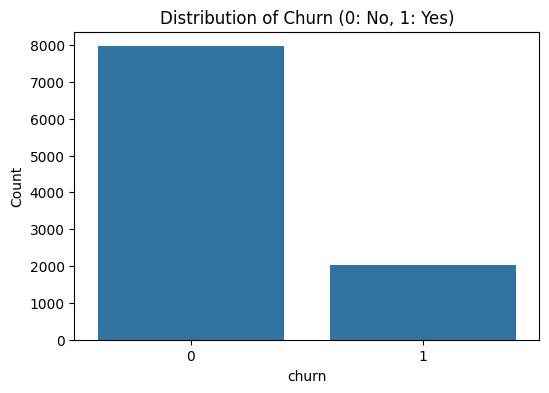

In [35]:
# EDA - Class Distribution and Correlation

print("-" * 50)
print("--- Exploratory Data Analysis (EDA) ---")
print("-" * 50)

# 1. DISTRIBUTION OF CLASSES (Visualization)
churn_rate = Y.mean() * 100
print(f"\nOverall Churn Rate: {churn_rate:.2f}% (Significant Imbalance: ~20% Churn)")

plt.figure(figsize=(6, 4))
sns.countplot(x=Y)
plt.title('Distribution of Churn (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

# 2. CORRELATION ANALYSIS (with Target)
# Create a temporary DataFrame including the target variable (Y) for correlation calculation
df_corr = X_encoded.copy()
df_corr['churn'] = Y

# Calculate correlation with the target and sort
corr_with_target = df_corr.corr()['churn'].sort_values(ascending=False)


Top 10 Features Correlated with Churn:
age                 0.285323
country_Germany     0.173488
balance             0.118533
estimated_salary    0.012097
credit_card        -0.007138
tenure             -0.014001
credit_score       -0.027094
products_number    -0.047820
country_Spain      -0.052667
gender_Male        -0.106512
Name: churn, dtype: float64


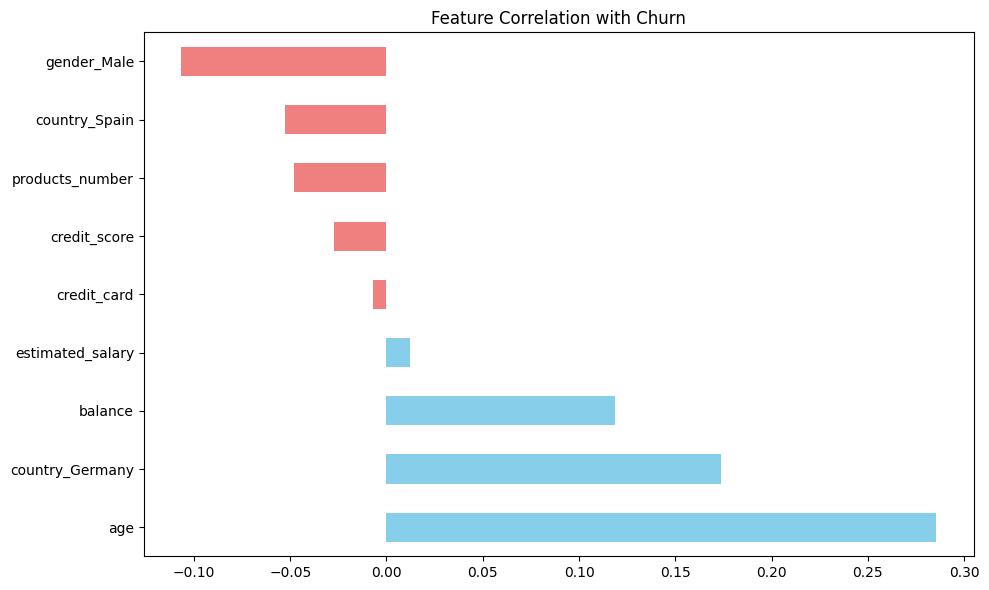

In [30]:
print("\nTop 10 Features Correlated with Churn:")
# Exclui a correlação de 'churn' consigo mesmo (que é 1)
print(corr_with_target[1:11])

# Plot the top correlations for visualization
plt.figure(figsize=(10, 6))
# Seleciona as correlações mais fortes (positivas e negativas)
top_corr_viz = pd.concat([corr_with_target[1:6], corr_with_target[-5:-1]])
top_corr_viz.plot(kind='barh', color=np.where(top_corr_viz > 0, 'skyblue', 'lightcoral'))
plt.title('Feature Correlation with Churn')
plt.tight_layout()
plt.show()

### **Key Insights**

Based on the EDA and correlation analysis, we draw the following insights for model selection and evaluation:

1.  **Class Imbalance:** The data exhibits a significant imbalance (approx. 80% No Churn vs. 20% Churn). This means simple **Accuracy** is misleading. We must prioritize metrics like **F1-Score** and **ROC-AUC** for model evaluation.
2.  **Strong Predictors:** Features like **Age**, **Balance**, and **Products_Number** show the strongest positive correlation with churn. This suggests that older customers, those with higher account balances, and those with fewer products are more likely to leave the bank.

##**3. Model Implementation and Evaluation**
Implemented and evaluated K-Nearest Neighbors (KNN) and Logistic Regression.

###**Model 1: K-Nearest Neighbors (KNN)**

KNN was optimized using `Grid Search` to find the best n_neighbors (k) based on the `F1-Score` (critical for the minority class).

Best K value found: 5

--- KNN Classification Report (Test Set) ---
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1593
           1       0.68      0.42      0.52       407

    accuracy                           0.84      2000
   macro avg       0.77      0.69      0.71      2000
weighted avg       0.83      0.84      0.83      2000



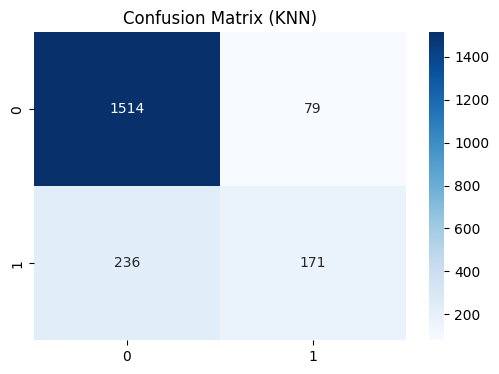

KNN ROC-AUC Score: 0.7928


In [36]:
# KNN Training and Tuning

# Hyperparameter Tuning using Grid Search
param_grid = {'n_neighbors': np.arange(1, 25)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5, scoring='f1', n_jobs=-1)
knn_cv.fit(X_train, y_train)

best_knn = knn_cv.best_estimator_

print(f"Best K value found: {knn_cv.best_params_['n_neighbors']}")

# Prediction and Evaluation
y_pred_knn = best_knn.predict(X_test)
y_proba_knn = best_knn.predict_proba(X_test)[:, 1]

print("\n--- KNN Classification Report (Test Set) ---")
print(classification_report(y_test, y_pred_knn))

# Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (KNN)')
plt.show() #

auc_knn = roc_auc_score(y_test, y_proba_knn)
print(f"KNN ROC-AUC Score: {auc_knn:.4f}")

### **Model 2: Logistic Regression**
Logistic Regression is implemented as an interpretable baseline model.

--- Logistic Regression Classification Report (Test Set) ---
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1593
           1       0.59      0.19      0.28       407

    accuracy                           0.81      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



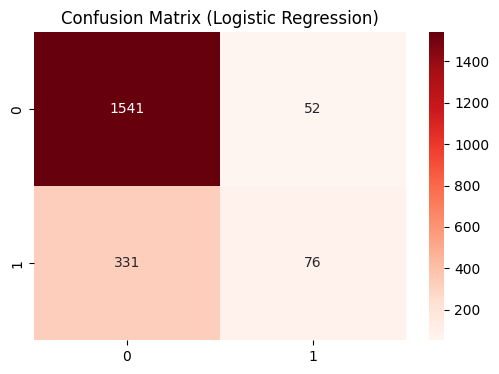

Logistic Regression ROC-AUC Score: 0.7748


In [38]:
# Logistic Regression Training and Evaluation

# Initialize and train the Logistic Regression model
logreg_model = LogisticRegression(solver='liblinear', random_state=42)
logreg_model.fit(X_train, y_train)

# Prediction and Evaluation
y_pred_logreg = logreg_model.predict(X_test)
y_proba_logreg = logreg_model.predict_proba(X_test)[:, 1]

print("--- Logistic Regression Classification Report (Test Set) ---")
print(classification_report(y_test, y_pred_logreg))

# Confusion Matrix
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix (Logistic Regression)')
plt.show() #

auc_logreg = roc_auc_score(y_test, y_proba_logreg)
print(f"Logistic Regression ROC-AUC Score: {auc_logreg:.4f}")

### **Combined ROC Curve Visualization**

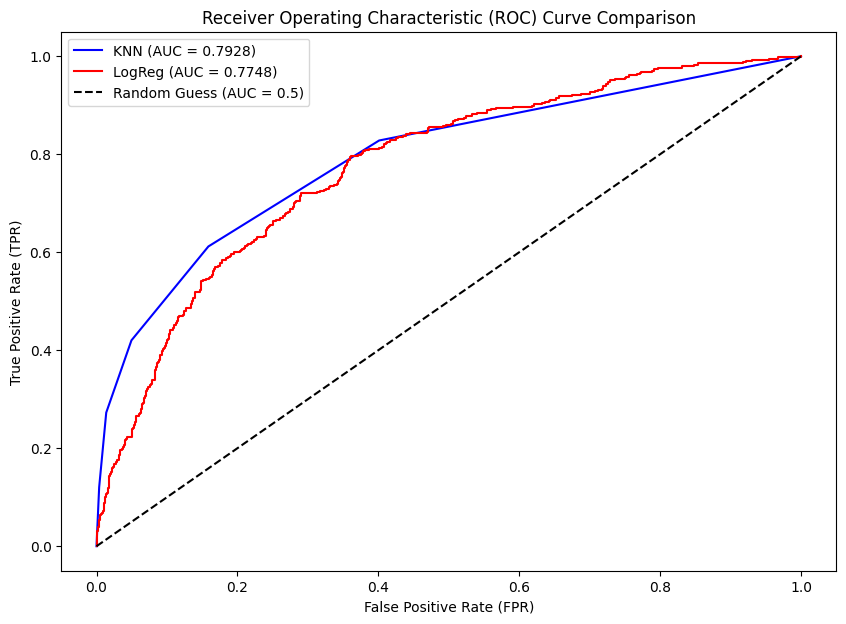

In [39]:
# Combined ROC Curve Visualization

fpr_knn, tpr_knn, _ = roc_curve(y_test, y_proba_knn)
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_proba_logreg)

plt.figure(figsize=(10, 7))
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {auc_knn:.4f})', color='blue')
plt.plot(fpr_logreg, tpr_logreg, label=f'LogReg (AUC = {auc_logreg:.4f})', color='red')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.5)')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve Comparison')
plt.legend()
plt.show()

## **4. Model Interpretation and Inference**
### **Detailed Interpretation and Model Comparison**
The primary challenge in this project is the **class imbalance** (approx. 80% No Churn vs. 20% Churn). Therefore, evaluation focused on **F1-Score** (the harmonic mean of precision and recall for the minority class) and **ROC-AUC Score** (the model's overall ability to distinguish between classes at various probability thresholds).

| Métrica (Score para Churn=1) | K-Nearest Neighbors (KNN) | Regressão Logística |
| :--- | :--- | :--- |
| **F1-Score (Classe '1')** | **0.5205** | 0.2841 |
| **ROC-AUC Score** | **0.7928** | 0.7748 |
| **Melhor Hiperparâmetro** | $K=5$ | N/A |

### **Inference and Selection:**

* **Best Model:** The **K-Nearest Neighbors (KNN) model** (optimized with $K=5$) clearly outperformed Logistic Regression across both critical metrics.
* **F1-Score:** KNN's F1-Score of **0.5205** is significantly better than Logistic Regression's $0.2841$. This demonstrates that KNN is much more effective at balancing **Precision** and **Recall** when identifying the minority class (actual churners).
* **ROC-AUC:** KNN's ROC-AUC of **0.7928** confirms its superior overall ability to rank customers by churn risk probability.
* **Conclusion:** **KNN is the selected model** for deployment as it provides the most robust detection of high-risk customers, offering the best opportunity for targeted intervention.


### **Visualization of Results**


In [41]:
print("--- Final Model Visualization Summary ---")
print("\nVisualization assets created in Step 3 include:")
print(" - Confusion Matrix (KNN) - Visualizing True Positives/Negatives for the best model.")
print(" - Combined ROC Curve - Demonstrating KNN's superior Area Under the Curve (AUC = 0.7928).")

--- Final Model Visualization Summary ---

Visualization assets created in Step 3 include:
 - Confusion Matrix (KNN) - Visualizing True Positives/Negatives for the best model.
 - Combined ROC Curve - Demonstrating KNN's superior Area Under the Curve (AUC = 0.7928).


## **5. Deployment and Monitoring**
### **Deployment Strategy**

The selected **K-Nearest Neighbors (KNN) model** must be deployed to provide real-time churn risk scores.

1.  **Model Persistence:** The final trained KNN model `best_knn` and the data `scaler` `StandardScaler` must be saved to disk using the `joblib` library. This is crucial for maintaining the exact preprocessing pipeline in production.

2.  **API Deployment:** The model should be deployed as a **RESTful API microservice** (for example, using Flask or FastAPI) on a scalable cloud platform (e.g., Google Cloud Run or AWS SageMaker).

3.  **Real-Time Inference:** When new customer data is sent to the API, the service must:
    * Reload the saved `scaler`.
    * Preprocess (scale) the numerical features.
    * Reload the saved `knn_model`.
    * Generate the prediction `.predict_proba()` and return the churn probability score to the bank's operational system (CRM).

### **Potential Issues and Monitoring Strategies**

| Issue | Strategy for Ongoing Monitoring and Maintenance |
| :--- | :--- |
| **Performance Degradation (Model Decay)** | Track the **ROC-AUC** and **F1-Score** on recent, labeled production data monthly. If the performance drops below a threshold (e.g., AUC < 0.75), an automated alert must trigger immediate **model retraining** using the latest dataset. |
| **Data Drift** | Monitor the statistical distribution (mean/std dev) of key features like **Age** and **Balance** in live data. Significant shifts (Data Drift) indicate the model is operating outside its training domain. **Solution:** Retrain the model on the new data distribution. |
| **Scalability/Latency** | Monitor the **API response time (latency)**. Ensure the cloud infrastructure is auto-scaling to keep latency low (e.g., under $100ms$) for real-time applications. |

## **Model Persistence (Saving for Deployment)**

In [42]:
# Model Persistence (Saving for Deployment)

from joblib import dump

# This step saves the trained model and the scaler to disk, which is the first step
# in deploying the model for real-time scoring.

try:
    # 1. Save the best trained model (KNN)
    # The variable 'best_knn' comes from your GridSearchCV output in Step 3.
    dump(best_knn, 'bank_churn_knn_model.joblib')

    # 2. Save the scaler used for data preprocessing
    # The variable 'scaler' comes from your StandardScaler fit in Step 1.
    dump(scaler, 'bank_churn_scaler.joblib')

    print("Success: Final KNN Model and Scaler saved as .joblib files for deployment.")

except NameError as e:
    print(f"ERROR: Variable not found: {e}. Please ensure you ran all previous cells where 'best_knn' and 'scaler' were defined.")

Success: Final KNN Model and Scaler saved as .joblib files for deployment.
